<a href="https://colab.research.google.com/github/ares-md/challenge-alura-store-alm/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Unir usando llaves (keys)
df = pd.concat([tienda, tienda2, tienda3, tienda4],
               keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Para que la tienda sea una columna normal y no un índice, usamos reset_index
df = df.reset_index(level=0).rename(columns={'level_0': 'Tienda_Origen'})

df.head()

,Tienda_Origen,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Tienda 1,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Tienda 1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Tienda 1,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Tienda 1,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Tienda 1,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
#Facturación por tienda
facturacion_total = df.groupby('Tienda_Origen')['Precio'].sum()

# Formatear la serie de facturación_total
facturacionT_legible = facturacion_total.apply(lambda x: "${:,.2f}".format(x))

print(facturacionT_legible)

Tienda_Origen
Tienda 1    $1,150,880,400.00
Tienda 2    $1,116,343,500.00
Tienda 3    $1,098,019,600.00
Tienda 4    $1,038,375,700.00
Name: Precio, dtype: object


In [ ]:
# 1. Crear la tabla base
pago_tienda = df.groupby(['Tienda_Origen', 'Método de pago'])['Precio'].sum().unstack()

# 2. Agregar la columna 'Total' sumando las columnas existentes
pago_tienda['Total'] = pago_tienda.sum(axis=1)

# 3. Aplicar estilo con formato de moneda y resaltar el total
pago_tienda_final = (pago_tienda.style
                     .format("${:,.2f}")
                     .background_gradient(cmap='YlGn', subset=['Total']) # Degradado solo en el total
                     )

pago_tienda_final

Método de pago,Cupón,Nequi,Tarjeta de crédito,Tarjeta de débito,Total
Tienda_Origen,,,,,
Tienda 1,"$64,105,500.00","$232,609,700.00","$840,665,800.00","$13,499,400.00","$1,150,880,400.00"
Tienda 2,"$77,366,600.00","$210,748,800.00","$816,659,500.00","$11,568,600.00","$1,116,343,500.00"
Tienda 3,"$47,411,300.00","$229,322,400.00","$804,570,700.00","$16,715,200.00","$1,098,019,600.00"
Tienda 4,"$46,986,200.00","$208,003,300.00","$768,711,100.00","$14,675,100.00","$1,038,375,700.00"


In [ ]:
# 1. Crear la tabla pivote de Tienda vs Método de Pago
pago_tienda = df.groupby(['Tienda_Origen', 'Método de pago'])['Precio'].sum().unstack()

# 2. Agregar la columna de Total (sumatoria horizontal)
pago_tienda['Total'] = pago_tienda.sum(axis=1)

# 3. Aplicar estilos:
# - format: para moneda legible
# - highlight_max: resalta la tienda con mejor performance en cada columna (axis=0)
# - background_gradient: para ver la intensidad en la columna Total
pago_tienda_estilizado = (pago_tienda.style
                          .format("${:,.2f}")
                          .highlight_max(axis=0, color='lightgreen')
                          .background_gradient(cmap='YlGn', subset=['Total']))

pago_tienda_estilizado

Método de pago,Cupón,Nequi,Tarjeta de crédito,Tarjeta de débito,Total
Tienda_Origen,,,,,
Tienda 1,"$64,105,500.00","$232,609,700.00","$840,665,800.00","$13,499,400.00","$1,150,880,400.00"
Tienda 2,"$77,366,600.00","$210,748,800.00","$816,659,500.00","$11,568,600.00","$1,116,343,500.00"
Tienda 3,"$47,411,300.00","$229,322,400.00","$804,570,700.00","$16,715,200.00","$1,098,019,600.00"
Tienda 4,"$46,986,200.00","$208,003,300.00","$768,711,100.00","$14,675,100.00","$1,038,375,700.00"


# 2. Ventas por categoría

In [ ]:
#Facturación por categoria
facturacion_total_cat = df.groupby('Categoría del Producto')['Precio'].sum()

# Formatear la serie de facturación_total
facturacionT_legible_cat = facturacion_total_cat.apply(lambda x: "${:,.2f}".format(x))

print(facturacionT_legible_cat)

Categoría del Producto
Artículos para el hogar       $57,579,800.00
Deportes y diversión         $142,977,700.00
Electrodomésticos          $1,324,751,100.00
Electrónicos               $1,660,576,500.00
Instrumentos musicales       $348,772,600.00
Juguetes                      $73,604,400.00
Libros                        $37,696,100.00
Muebles                      $757,661,000.00
Name: Precio, dtype: object


In [ ]:
# 1. Crear la tabla pivote
Cat_tienda = df.groupby(['Tienda_Origen', 'Categoría del Producto'])['Precio'].sum().unstack()

# 2. Agregar la columna de Total (Suma Horizontal)
Cat_tienda['Total'] = Cat_tienda.sum(axis=1)

# 3. Agregar la fila de Total (Suma Vertical)
Cat_tienda.loc['Total_Global'] = Cat_tienda.sum(axis=0)

# 4. Definir qué filas queremos resaltar (todas menos 'Total_Global')
filas_tiendas = Cat_tienda.index[:-1]

# 5. Aplicar estilos
Cat_tienda_estilizado = (Cat_tienda.style
                          .format("${:,.2f}")
                          # Resalta el máximo solo en las filas de las tiendas (axis=0)
                          .highlight_max(axis=0, color='lightgreen', subset=(filas_tiendas, Cat_tienda.columns))
                          # Aplicamos el degradado solo a la columna Total, pero sin la fila global
                          .background_gradient(cmap='YlGn', subset=(filas_tiendas, ['Total'])))

Cat_tienda_estilizado

Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles,Total
Tienda_Origen,,,,,,,,,
Tienda 1,"$12,698,400.00","$39,290,000.00","$363,685,200.00","$429,493,500.00","$91,299,000.00","$17,995,700.00","$8,784,900.00","$187,633,700.00","$1,150,880,400.00"
Tienda 2,"$14,746,900.00","$34,744,500.00","$348,567,800.00","$410,831,100.00","$104,990,300.00","$15,945,400.00","$10,091,200.00","$176,426,300.00","$1,116,343,500.00"
Tienda 3,"$15,060,000.00","$35,593,100.00","$329,237,900.00","$410,775,800.00","$77,380,900.00","$19,401,100.00","$9,498,700.00","$201,072,100.00","$1,098,019,600.00"
Tienda 4,"$15,074,500.00","$33,350,100.00","$283,260,200.00","$409,476,100.00","$75,102,400.00","$20,262,200.00","$9,321,300.00","$192,528,900.00","$1,038,375,700.00"
Total_Global,"$57,579,800.00","$142,977,700.00","$1,324,751,100.00","$1,660,576,500.00","$348,772,600.00","$73,604,400.00","$37,696,100.00","$757,661,000.00","$4,403,619,200.00"


# 3. Calificación promedio de la tienda


In [ ]:
# 1. Calcular el promedio de calificación por tienda
ranking_servicio = df.groupby('Tienda_Origen')['Calificación'].mean()

# 2. Ordenar de mayor a menor
ranking_servicio = ranking_servicio.sort_values(ascending=False)

# 3. Formatear para mostrar solo 2 decimales y aplicar estilo
ranking_estilizado = (ranking_servicio.to_frame().style
                      .format("{:.2f}")
                      .background_gradient(cmap='RdYlGn')) # Rojo (bajo) a Verde (alto)

ranking_estilizado

,Calificación
Tienda_Origen,
Tienda 3,4.05
Tienda 2,4.04
Tienda 4,4.00
Tienda 1,3.98


In [ ]:
# 1. Agrupar por tienda y calcular promedio de Calificación y suma de Precio (Ventas)
analisis_final = df.groupby('Tienda_Origen').agg({
    'Calificación': 'mean',
    'Precio': 'sum'
})

# 2. Ordenar de mayor a menor según la Calificación
analisis_final = analisis_final.sort_values(by='Calificación', ascending=False)

# 3. Aplicar el estilo para que sea legible y visual
analisis_estilizado = (analisis_final.style
                       .format({
                           'Calificación': '{:.2f}',
                           'Precio': '${:,.2f}'
                       })
                       .background_gradient(subset=['Calificación'], cmap='RdYlGn') # Verde para mejor nota
                       .background_gradient(subset=['Precio'], cmap='Blues'))       # Azul para más ventas

analisis_estilizado

,Calificación,Precio
Tienda_Origen,,
Tienda 3,4.05,"$1,098,019,600.00"
Tienda 2,4.04,"$1,116,343,500.00"
Tienda 4,4.00,"$1,038,375,700.00"
Tienda 1,3.98,"$1,150,880,400.00"


# 4. Productos más y menos vendidos

In [ ]:
# Calcular la cantidad total de productos únicos (SKUs) en todo el DataFrame
total_skus = df['Producto'].nunique()

print(f"Número de códigos únicos (SKU): {total_skus}")

Número de códigos únicos (SKU): 51


In [ ]:
# 1. Agrupar por producto y calcular Suma y Conteo
top_productos = df.groupby('Producto').agg({
    'Precio': ['sum', 'count']
})

# 2. Aplanar los niveles de las columnas para que sean fáciles de leer
top_productos.columns = ['Ventas Totales', 'Cantidad Vendida']

# 3. Obtener el Top 10 (Ordenado por Ventas Totales de mayor a menor)
top_10 = top_productos.sort_values(by='Ventas Totales', ascending=False).head(10)

# 4. Obtener el Bottom 10 (Ordenado por Ventas Totales de menor a mayor)
bottom_10 = top_productos.sort_values(by='Ventas Totales', ascending=True).head(10)

# --- Visualización con estilo ---

print("--- TOP 10 PRODUCTOS MÁS VENDIDOS ---")
display(top_10.style.format({'Ventas Totales': '${:,.2f}', 'Cantidad Vendida': '{:,}'})
              .background_gradient(cmap='Blues', subset=['Ventas Totales']))

print("\n--- BOTTOM 10 PRODUCTOS MENOS VENDIDOS ---")
display(bottom_10.style.format({'Ventas Totales': '${:,.2f}', 'Cantidad Vendida': '{:,}'})
                 .background_gradient(cmap='Reds', subset=['Ventas Totales']))

--- TOP 10 PRODUCTOS MÁS VENDIDOS ---


,Ventas Totales,Cantidad Vendida
Producto,,
TV LED UHD 4K,"$432,489,600.00",187
Iphone 15,"$401,051,200.00",198
Refrigerador,"$384,937,400.00",191
Smart TV,"$290,221,800.00",192
Lavadora de ropa,"$242,468,600.00",176
Lavavajillas,"$240,536,500.00",189
Tablet ABXY,"$219,012,800.00",179
Secadora de ropa,"$210,238,000.00",200
Celular ABXY,"$157,911,100.00",157



--- BOTTOM 10 PRODUCTOS MENOS VENDIDOS ---


,Ventas Totales,Cantidad Vendida
Producto,,
Cubo mágico 8x8,"$2,729,300.00",180
Cuerda para saltar,"$3,068,300.00",186
Dinosaurio Rex,"$3,112,900.00",175
Ajedrez de madera,"$5,149,100.00",180
Set de vasos,"$5,584,200.00",169
Dashboards con Power BI,"$6,418,400.00",181
Bloques de construcción,"$6,802,100.00",199
Vaso térmico,"$8,497,400.00",187
Cubertería,"$8,560,400.00",189


In [ ]:
# 1. Agrupar por producto y sumar ventas
ventas_por_prod = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# 2. Calcular totales
ventas_totales_global = ventas_por_prod.sum()
ventas_top_10 = ventas_por_prod.head(10).sum()

# 3. Calcular porcentaje
porcentaje_top_10 = (ventas_top_10 / ventas_totales_global) * 100

print(f"Las ventas del Top 10 representan el {porcentaje_top_10:.2f}% del total global.")

Las ventas del Top 10 representan el 61.92% del total global.


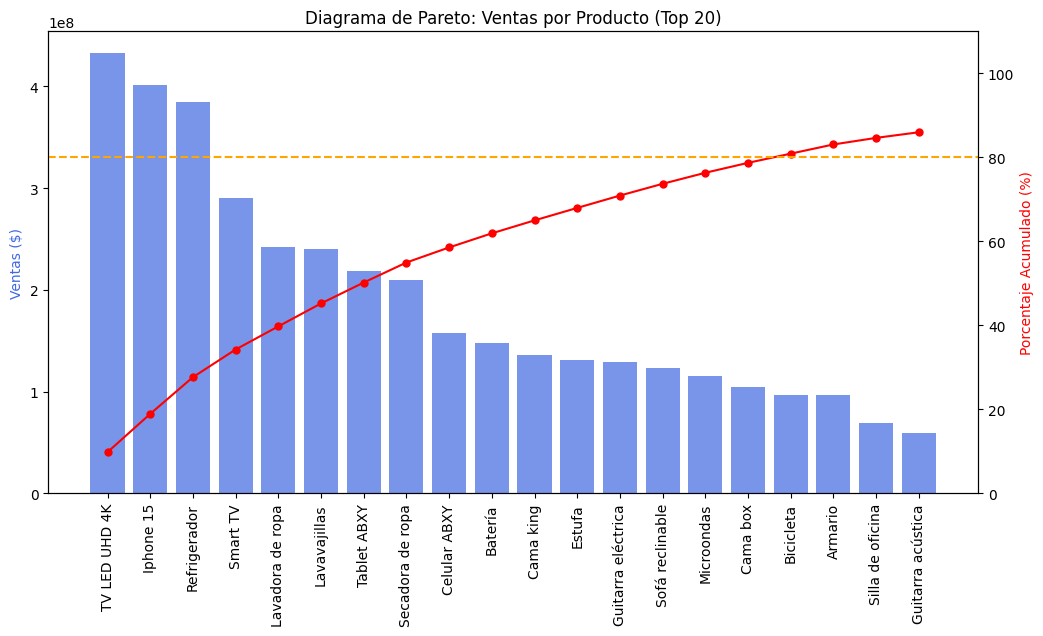

In [ ]:
import matplotlib.pyplot as plt

# Preparar datos para el gráfico
pareto_df = ventas_por_prod.to_frame()
pareto_df['Ventas_Acumuladas'] = pareto_df['Precio'].cumsum()
pareto_df['Porcentaje_Acumulado'] = (pareto_df['Ventas_Acumuladas'] / ventas_totales_global) * 100

# Limitar al Top 20 para que el gráfico sea legible
pareto_top = pareto_df.head(20)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras (Ventas individuales)
ax1.bar(pareto_top.index, pareto_top['Precio'], color='royalblue', alpha=0.7)
ax1.set_ylabel('Ventas ($)', color='royalblue')
ax1.tick_params(axis='x', rotation=90)

# Gráfico de línea (Porcentaje acumulado)
ax2 = ax1.twinx()
ax2.plot(pareto_top.index, pareto_top['Porcentaje_Acumulado'], color='red', marker='o', ms=5)
ax2.axhline(80, color='orange', linestyle='--') # Línea del 80%
ax2.set_ylabel('Porcentaje Acumulado (%)', color='red')
ax2.set_ylim(0, 110)

plt.title('Diagrama de Pareto: Ventas por Producto (Top 20)')
plt.show()

In [ ]:
# 1. Identificar los 10 productos con menos ventas globales
bottom_10_lista = df.groupby('Producto')['Precio'].sum().sort_values(ascending=True).head(10).index

# 2. Filtrar el DataFrame original para quedarnos solo con las ventas de esos 10 productos
df_bottom = df[df['Producto'].isin(bottom_10_lista)]

# 3. Contar cuántas ventas de estos productos ocurrieron en cada tienda
concentracion_bottom = df_bottom.groupby('Tienda_Origen').agg({
    'Precio': ['count', 'sum']
})

# 4. Limpiar nombres de columnas y ordenar
concentracion_bottom.columns = ['Cantidad de Ventas (Bottom 10)', 'Monto Total ($)']
concentracion_bottom = concentracion_bottom.sort_values(by='Cantidad de Ventas (Bottom 10)', ascending=False)

# 5. Mostrar con estilo
print("--- CONCENTRACIÓN DE LOS 10 PRODUCTOS MENOS VENDIDOS POR TIENDA ---")
display(concentracion_bottom.style.format({'Monto Total ($)': '${:,.2f}'})
                          .background_gradient(cmap='OrRd'))

--- CONCENTRACIÓN DE LOS 10 PRODUCTOS MENOS VENDIDOS POR TIENDA ---


,Cantidad de Ventas (Bottom 10),Monto Total ($)
Tienda_Origen,,
Tienda 4,487,"$15,911,300.00"
Tienda 2,459,"$14,749,900.00"
Tienda 1,458,"$14,952,700.00"
Tienda 3,417,"$12,899,700.00"


In [ ]:
# 1. Identificar el Top 10 de productos global (por ingresos)
top_10_global = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(10).index

# 2. Crear métricas por tienda
# Ventas y Calificación
resumen = df.groupby('Tienda_Origen').agg({
    'Precio': 'sum',
    'Calificación': 'mean',
    'Lugar de Compra': 'nunique' # Alcance geográfico: cuántas ciudades distintas
})

# 3. Calcular concentración de Top 10 por tienda
def calcular_concentracion_top(row):
    ventas_tienda = df[df['Tienda_Origen'] == row.name]
    ventas_top = ventas_tienda[ventas_tienda['Producto'].isin(top_10_global)]['Precio'].sum()
    return (ventas_top / ventas_tienda['Precio'].sum()) * 100

resumen['% Ventas Top 10'] = resumen.apply(calcular_concentracion_top, axis=1)

# 4. Renombrar y Organizar
resumen.columns = ['Ventas Totales', 'Calificación Promedio', 'Alcance Geográfico (Ciudades)', '% Dependencia Top 10']
resumen = resumen.sort_values(by='Ventas Totales', ascending=False)

# 5. Estilizar
resumen_estilizado = (resumen.style
    .format({'Ventas Totales': '${:,.2f}', 'Calificación Promedio': '{:.2f}', '% Dependencia Top 10': '{:.2f}%'})
    .background_gradient(subset=['Ventas Totales'], cmap='Blues')
    .background_gradient(subset=['Calificación Promedio'], cmap='RdYlGn')
    .background_gradient(subset=['Alcance Geográfico (Ciudades)'], cmap='Purples')
    .background_gradient(subset=['% Dependencia Top 10'], cmap='Oranges'))

display(resumen_estilizado)

,Ventas Totales,Calificación Promedio,Alcance Geográfico (Ciudades),% Dependencia Top 10
Tienda_Origen,,,,
Tienda 1,"$1,150,880,400.00",3.98,19,62.95%
Tienda 2,"$1,116,343,500.00",4.04,19,63.07%
Tienda 3,"$1,098,019,600.00",4.05,19,61.15%
Tienda 4,"$1,038,375,700.00",4.00,19,60.34%


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Crear el mapa centrado en el promedio de las coordenadas (PARA VISUALIZAR CONCENTRACION DE PEDIDOS)
lat_inicial = df['lat'].mean()
lon_inicial = df['lon'].mean()
mapa = folium.Map(location=[lat_inicial, lon_inicial], zoom_start=6)

# Crear clusters para cada tienda con colores diferentes
marker_cluster = MarkerCluster().add_to(mapa)

# Colores para distinguir las tiendas
colores_tiendas = {
    'Tienda 1': 'blue',
    'Tienda 2': 'green',
    'Tienda 3': 'orange',
    'Tienda 4': 'red'
}

# Añadir puntos al mapa
# Nota: Usamos una muestra .sample() si el dataset es muy grande para no saturar el mapa
for idx, row in df.sample(min(2000, len(df))).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=f"{row['Tienda_Origen']} - {row['Lugar de Compra']}",
        color=colores_tiendas.get(row['Tienda_Origen'], 'gray'),
        fill=True,
        fill_color=colores_tiendas.get(row['Tienda_Origen'], 'gray'),
        fill_opacity=0.7
    ).add_to(marker_cluster)

mapa

In [ ]:
# 1. Crear la tabla pivote de Ventas (Ciudad vs Tienda)
tabla_mercado = df.pivot_table(index='Lugar de Compra',
                               columns='Tienda_Origen',
                               values='Precio',
                               aggfunc='sum',
                               fill_value=0)

# 2. Calcular totales por ciudad (filas) y total global
total_por_ciudad = tabla_mercado.sum(axis=1)
total_global_ventas = total_por_ciudad.sum()

# 3. Convertir a porcentajes de cuota por ciudad
tabla_porcentaje = tabla_mercado.div(total_por_ciudad, axis=0) * 100

# 4. Agregar la columna de Total Ventas (Moneda)
tabla_porcentaje['Venta Total Ciudad'] = total_por_ciudad

# 5. Calcular la Fila de TOTAL NACIONAL
# Para las tiendas, es el % de sus ventas totales sobre el gran total global
ventas_totales_tiendas = tabla_mercado.sum(axis=0)
cuota_nacional = (ventas_totales_tiendas / total_global_ventas) * 100

# Creamos la fila de totales
fila_total = cuota_nacional.to_dict()
fila_total['Venta Total Ciudad'] = total_global_ventas
tabla_porcentaje.loc['TOTAL NACIONAL'] = fila_total

# 6. Estilizar con formato estricto
estilo_final = (tabla_porcentaje.style
    .format({col: "{:.2f}%" for col in tabla_mercado.columns}) # 2 decimales y %
    .format({'Venta Total Ciudad': "${:,.2f}"})                # Moneda para el total
    .background_gradient(cmap='YlGnBu', subset=(tabla_porcentaje.index[:-1], tabla_mercado.columns)) # Calor sin la fila total
    .highlight_max(axis=1, props='color:white; font-weight:bold; background-color:#1B4F72;', subset=(tabla_porcentaje.index, tabla_mercado.columns))
    .set_properties(**{'text-align': 'center'})
    .set_properties(subset=pd.IndexSlice['TOTAL NACIONAL', :], **{'font-weight': 'bold', 'border-top': '2px solid black'})) # Resaltar fila total

estilo_final

Tienda_Origen,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Venta Total Ciudad
Lugar de Compra,,,,,
Armenia,37.701035,27.470616,32.511088,2.317261,"$12,242,900.00"
Barranquilla,24.922429,21.009690,27.846380,26.221500,"$132,040,500.00"
Bogotá,24.244593,26.446098,26.203814,23.105495,"$1,814,858,300.00"
Bucaramanga,19.408810,26.382609,25.988785,28.219795,"$90,573,300.00"
Cali,30.500640,23.346793,21.575907,24.576661,"$506,526,100.00"
Cartagena,21.779077,21.048051,33.351436,23.821436,"$102,376,700.00"
Cúcuta,38.119999,29.175569,25.325277,7.379155,"$99,369,100.00"
Inírida,33.661395,30.967247,16.490065,18.881292,"$8,087,900.00"
Leticia,21.846347,24.064072,28.611807,25.477774,"$67,149,900.00"


# 5. Envío promedio por tienda

In [ ]:
# 1. Calcular el promedio del Costo de Envío por tienda
envio_tienda = df.groupby('Tienda_Origen')['Costo de envío'].mean().to_frame()

# 2. Renombrar la columna para mayor claridad
envio_tienda.columns = ['Envío Promedio']

# 3. Ordenar de MAYOR a MENOR (los más caros arriba)
envio_tienda = envio_tienda.sort_values(by='Envío Promedio', ascending=False)

# 4. Aplicar estilos
# Usamos el mapa de color 'RdYlGn_r' (_r significa 'reversed')
# Esto pone el Rojo en los valores altos y el Verde en los bajos
envio_estilizado = (envio_tienda.style
                    .format("${:,.2f}")
                    .background_gradient(cmap='RdYlGn_r', subset=['Envío Promedio'])
                    .set_caption("Ranking de Costos Logísticos por Tienda"))

envio_estilizado

,Envío Promedio
Tienda_Origen,
Tienda 1,"$26,018.61"
Tienda 2,"$25,216.24"
Tienda 3,"$24,805.68"
Tienda 4,"$23,459.46"


In [ ]:
# 1. Identificar el Top 10 de productos global (por ingresos)
top_10_global_nombres = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(10).index

# 2. Filtrar solo las ventas que pertenecen a ese Top 10
df_top_10 = df[df['Producto'].isin(top_10_global_nombres)]
venta_total_top_10_nacional = df_top_10['Precio'].sum()

# 3. Calcular cuánto vende cada tienda de ese Top 10
venta_top_por_tienda = df_top_10.groupby('Tienda_Origen')['Precio'].sum()

# 4. Crear la matriz base con los KPIs anteriores
matriz_final = df.groupby('Tienda_Origen').agg({
    'Costo de envío': 'mean',
    'Precio': 'sum',
    'Calificación': 'mean'
})

# 5. Calcular la Participación sobre las Ventas del Top 10 Nacional
matriz_final['% Participación Ventas Top 10'] = (venta_top_por_tienda / venta_total_top_10_nacional) * 100

# Llenar nulos con 0 por si alguna tienda no vendió nada del Top 10
matriz_final['% Participación Ventas Top 10'] = matriz_final['% Participación Ventas Top 10'].fillna(0)

# 6. Renombrar y Ordenar
matriz_final.columns = ['Costo Envío (Prom)', 'Ventas Totales', 'Calificación (Prom)', '% Dominancia Ventas de Productos Top 10']
matriz_final = matriz_final.sort_values(by='Ventas Totales', ascending=False)

# 7. Estilizar
estilo_final = (matriz_final.style
    .format({
        'Costo Envío (Prom)': '${:,.2f}',
        'Ventas Totales': '${:,.2f}',
        'Calificación (Prom)': '{:.2f}',
        '% Dominancia Top Ventas de Productos Top 10': '{:.2f}%'
    })
    .background_gradient(subset=['Costo Envío (Prom)'], cmap='RdYlGn_r')
    .background_gradient(subset=['Ventas Totales'], cmap='Blues')
    .background_gradient(subset=['Calificación (Prom)'], cmap='RdYlGn')
    .background_gradient(subset=['% Dominancia Ventas de Productos Top 10'], cmap='Purples')
    .set_properties(**{'text-align': 'center'})
)

estilo_final

,Costo Envío (Prom),Ventas Totales,Calificación (Prom),% Dominancia Ventas de Productos Top 10
Tienda_Origen,,,,
Tienda 1,"$26,018.61","$1,150,880,400.00",3.98,26.572065
Tienda 2,"$25,216.24","$1,116,343,500.00",4.04,25.821729
Tienda 3,"$24,805.68","$1,098,019,600.00",4.05,24.626086
Tienda 4,"$23,459.46","$1,038,375,700.00",4.00,22.980120


In [ ]:
import pandas as pd

# 1. Preparar las métricas base
kpis = df.groupby('Tienda_Origen').agg({
    'Precio': 'sum',
    'Calificación': 'mean',
    'Costo de envío': 'mean'
})

# 2. Calcular la Dominancia del Top 10 (Participación nacional)
top_10_nombres = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(10).index
venta_top_nacional = df[df['Producto'].isin(top_10_nombres)]['Precio'].sum()
kpis['Dominancia_Top10'] = (df[df['Producto'].isin(top_10_nombres)].groupby('Tienda_Origen')['Precio'].sum() / venta_top_nacional)

# 3. NORMALIZACIÓN (Escalar de 0 a 1 para que sean comparables)
# Ventas, Calificación y Dominancia: Más es mejor
kpis['n_Ventas'] = (kpis['Precio'] - kpis['Precio'].min()) / (kpis['Precio'].max() - kpis['Precio'].min())
kpis['n_Calificacion'] = (kpis['Calificación'] - kpis['Calificación'].min()) / (kpis['Calificación'].max() - kpis['Calificación'].min())
kpis['n_Dominancia'] = (kpis['Dominancia_Top10'] - kpis['Dominancia_Top10'].min()) / (kpis['Dominancia_Top10'].max() - kpis['Dominancia_Top10'].min())

# Costo de Envío: Menos es mejor (Inversión)
kpis['n_Envio'] = (kpis['Costo de envío'].max() - kpis['Costo de envío']) / (kpis['Costo de envío'].max() - kpis['Costo de envío'].min())

# 4. APLICAR PONDERACIONES (Ventas 0.3, Calificación 0.2, Envío 0.3, Top10 0.2)
kpis['SCORE_FINAL'] = (
    (kpis['n_Ventas'] * 0.3) +
    (kpis['n_Calificacion'] * 0.2) +
    (kpis['n_Envio'] * 0.3) +
    (kpis['n_Dominancia'] * 0.2)
)

# 5. Formatear Ranking Final
ranking = kpis[['Precio', 'Calificación', 'Costo de envío', 'Dominancia_Top10', 'SCORE_FINAL']]
ranking.columns = ['Ventas Totales', 'Calificación', 'Costo Envío', '% Dominancia Top 10', 'Puntaje Global']
ranking = ranking.sort_values(by='Puntaje Global', ascending=False)

# 6. Estilizar
ranking_estilizado = (ranking.style
    .format({
        'Ventas Totales': '${:,.2f}',
        'Calificación': '{:.2f}',
        'Costo Envío': '${:,.2f}',
        '% Dominancia Top 10': '{:.2%}',
        'Puntaje Global': '{:.3f}'
    })
    .background_gradient(subset=['Puntaje Global'], cmap='RdYlGn')
    .bar(subset=['Puntaje Global'], color='#5fba7d', vmin=0, vmax=1)
    .set_caption("RANKING ESTRATÉGICO DE TIENDAS (Ponderación 1.0)"))

ranking_estilizado

,Ventas Totales,Calificación,Costo Envío,% Dominancia Top 10,Puntaje Global
Tienda_Origen,,,,,
Tienda 2,"$1,116,343,500.00",4.04,"$25,216.24",25.82%,0.629
Tienda 3,"$1,098,019,600.00",4.05,"$24,805.68",24.63%,0.593
Tienda 1,"$1,150,880,400.00",3.98,"$26,018.61",26.57%,0.500
Tienda 4,"$1,038,375,700.00",4.00,"$23,459.46",22.98%,0.353


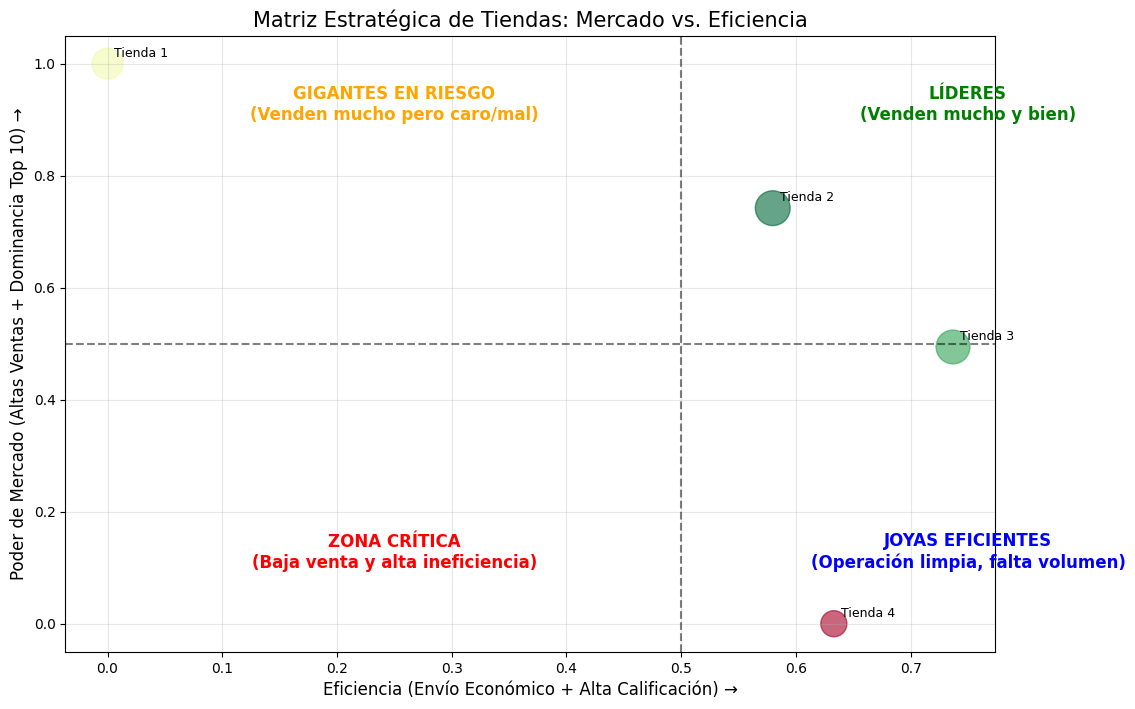

In [ ]:
import matplotlib.pyplot as plt

# 1. Crear las dos dimensiones para los ejes (usando las normales anteriores)
# Eje X: Logística y Satisfacción (Envío + Calificación) / 2
kpis['Eje_X_Eficiencia'] = (kpis['n_Envio'] + kpis['n_Calificacion']) / 2

# Eje Y: Ventas y Dominancia (Ventas + Top10) / 2
kpis['Eje_Y_Mercado'] = (kpis['n_Ventas'] + kpis['n_Dominancia']) / 2

# 2. Configurar el gráfico
plt.figure(figsize=(12, 8))
plt.scatter(kpis['Eje_X_Eficiencia'], kpis['Eje_Y_Mercado'], s=kpis['SCORE_FINAL']*1000,
            alpha=0.6, c=kpis['SCORE_FINAL'], cmap='RdYlGn')

# 3. Dibujar las líneas de los cuadrantes (en el promedio 0.5)
plt.axhline(0.5, color='black', linestyle='--', alpha=0.5)
plt.axvline(0.5, color='black', linestyle='--', alpha=0.5)

# 4. Etiquetas de los cuadrantes
plt.text(0.75, 0.9, 'LÍDERES\n(Venden mucho y bien)', fontsize=12, ha='center', color='green', fontweight='bold')
plt.text(0.25, 0.9, 'GIGANTES EN RIESGO\n(Venden mucho pero caro/mal)', fontsize=12, ha='center', color='orange', fontweight='bold')
plt.text(0.75, 0.1, 'JOYAS EFICIENTES\n(Operación limpia, falta volumen)', fontsize=12, ha='center', color='blue', fontweight='bold')
plt.text(0.25, 0.1, 'ZONA CRÍTICA\n(Baja venta y alta ineficiencia)', fontsize=12, ha='center', color='red', fontweight='bold')

# 5. Anotar los nombres de las tiendas
for tienda in kpis.index:
    plt.annotate(tienda, (kpis.loc[tienda, 'Eje_X_Eficiencia'], kpis.loc[tienda, 'Eje_Y_Mercado']),
                 xytext=(5,5), textcoords='offset points', fontsize=9)

plt.title('Matriz Estratégica de Tiendas: Mercado vs. Eficiencia', fontsize=15)
plt.xlabel('Eficiencia (Envío Económico + Alta Calificación) →', fontsize=12)
plt.ylabel('Poder de Mercado (Altas Ventas + Dominancia Top 10) →', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Evaluación Final**

Con base en los resultados del Ranking Estratégico, la tienda que recomendaría evaluar para un posible cierre o una reestructuración profunda es la *Tienda 4*.

A continuación, presento el análisis técnico de por qué, a pesar de tener un costo de envío bajo, es la sucursal más débil de la red:

Aunque el Puntaje Global de todas las tiendas parece estar en un rango medio (ninguna llega a 0.800 o 0.900), la Tienda 4 muestra deficiencias críticas en los pilares que generan volumen de negocio:

**Menor Poder de Ventas**: Es la tienda con la facturación más baja ($1,038M), quedando casi $112M por debajo de la Tienda 1.

**Baja Dominancia del Top 10**: Solo captura el 22.98% del mercado de los productos estrella. Esto indica que no es un punto de referencia para los clientes que buscan los productos más vendidos, lo que la vuelve menos relevante estratégicamente.

**Puntaje Global Deficiente** (0.353): Existe una distancia de casi 30 puntos porcentuales respecto a la Tienda 2 (líder). Esto significa que, en el equilibrio entre vender, ser eficiente y satisfacer al cliente, la Tienda 4 está fallando sistemáticamente en comparación con sus pares.

**¿Por qué no cerrar la Tienda 1 o la Tienda 3?**
Tienda 1: Aunque tiene el envío más caro ($26,018) y la peor calificación (3.98), es el motor de ventas número uno de la cadena ($1,150M) y tiene la mayor dominancia de venta de los productos Top 10. Cerrarla sería renunciar a la mayor fuente de ingresos. Es una tienda para optimizar, no para cerrar.

Tienda 3: Es la más equilibrada en cuanto a eficiencia logística y satisfacción del cliente (4.05 de calificación). Es una operación sana que sostiene el promedio.

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

# 1. Obtener las coordenadas (Lat, Lon) de los pedidos de cada tienda
coords_t4 = df[df['Tienda_Origen'] == 'Tienda 4'][['lat', 'lon']]
centro_t2 = df[df['Tienda_Origen'] == 'Tienda 2'][['lat', 'lon']].mean().values.reshape(1, 2)
centro_t3 = df[df['Tienda_Origen'] == 'Tienda 3'][['lat', 'lon']].mean().values.reshape(1, 2)

# 2. Calcular distancias (en grados, como proxy de cercanía)
dist_a_t2 = cdist(coords_t4, centro_t2, metric='euclidean').mean()
dist_a_t3 = cdist(coords_t4, centro_t3, metric='euclidean').mean()

# 3. Identificar pedidos de T4 que están en ciudades ya atendidas por T2 o T3
ciudades_t2_t3 = set(df[df['Tienda_Origen'].isin(['Tienda 2', 'Tienda 3'])]['Lugar de Compra'].unique())
pedidos_t4_recuperables = df[df['Tienda_Origen'] == 'Tienda 4']['Lugar de Compra'].isin(ciudades_t2_t3).mean() * 100

print(f"Distancia promedio T4 -> Centro T2: {dist_a_t2:.4f}")
print(f"Distancia promedio T4 -> Centro T3: {dist_a_t3:.4f}")
print(f"Porcentaje de cobertura compartida: {pedidos_t4_recuperables:.2f}%")

Distancia promedio T4 -> Centro T2: 1.9803
Distancia promedio T4 -> Centro T3: 1.9682
Porcentaje de cobertura compartida: 100.00%


Presento los tres hallazgos definitivos que justifican esta decisión:

**1. Canibalización Total (Cobertura del 100%)**
El dato de 100% de cobertura compartida significa que no hay un solo lugar donde la Tienda 4 entregue pedidos que la Tienda 2 o la Tienda 3 no estén entregando ya.

Se está manteniendo una estructura física, nómina y servicios para cubrir un territorio que ya está perfectamente cubierto por tus dos tiendas más eficientes.

**2. Proximidad Geográfica (Bajo Radio de Acción)**
Las distancias promedio hacia los centros de la Tienda 2 (1.98) y Tienda 3 (1.96) son prácticamente idénticas. Esto sugiere que la Tienda 4 está ubicada en un "punto muerto" o en medio del radio de acción de las otras dos.

No está proporcionando alcance geográfico adicional; solo está dividiendo el volumen de ventas que de todos modos caería en las manos de T2 o T3.

**3. El Beneficio Financiero de la Absorción**
Al cerrar la Tienda 4, los $1,038,375,700 de sus ventas no se pierden, se trasladan.

*Impacto en Rentabilidad:* Al pasar esas ventas a la Tienda 2 o 3, se aumenta su volumen, lo que permite negociar mejores tarifas con transportadoras por volumen de envíos.

*Ahorro de Gastos Fijos:* Se elimina el 100% de los costos operativos de una sucursal sin ceder ni un milímetro de mercado a la competencia.

***Plan de Acción Recomendado***
Unificación de Inventario: Mover el stock de la Tienda 4 hacia la Tienda 2 (que es tu líder actual en el ranking con 0.629). Esto reforzará a la tienda más fuerte.

Migración Logística: Reasigna las rutas de despacho de la Tienda 4 a la Tienda 3 (que tiene la mejor calificación, 4.05). Esto asegurará que, aunque el envío pueda subir ligeramente de costo por la distancia, la experiencia del cliente sea superior.

Monitoreo de Fuga: Durante los primeros 30 días tras el cierre, rastrea si los clientes habituales de la Tienda 4 están migrando efectivamente a las otras sucursales.